## Read the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
data = pd.read_csv("./penguins_size.csv")

In [3]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Basic information about the dataset

In [4]:
data.shape

(344, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
data.nunique()

species                3
island                 3
culmen_length_mm     164
culmen_depth_mm       80
flipper_length_mm     55
body_mass_g           94
sex                    3
dtype: int64

In [7]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [8]:
data['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Correlation between variables

culmen_length vs culmen_depth


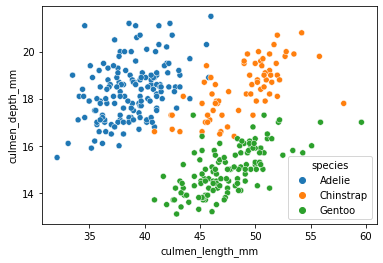

In [9]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.show()

culmen_length vs flipper_length


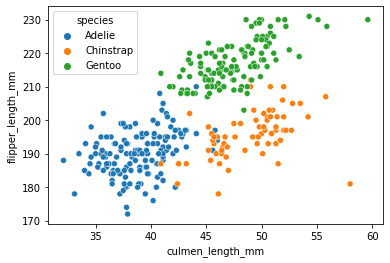

In [10]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=data,x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

culmen_depth vs flipper_length


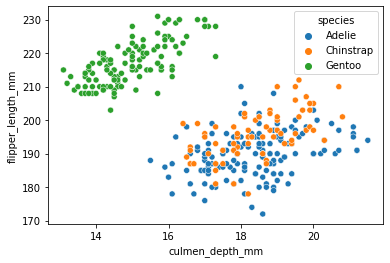

In [11]:
print('culmen_depth vs flipper_length')
sns.scatterplot(data=data, x='culmen_depth_mm', y='flipper_length_mm', hue='species')
plt.show()

culmen_depth vs body_mass


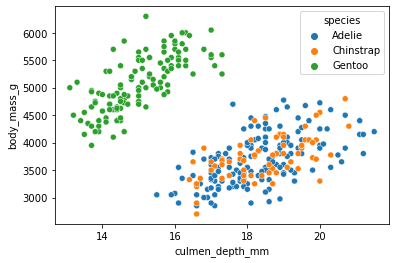

In [12]:
print('culmen_depth vs body_mass')
sns.scatterplot(data=data, x='culmen_depth_mm', y='body_mass_g', hue='species')
plt.show()

culmen_length vs body_mass


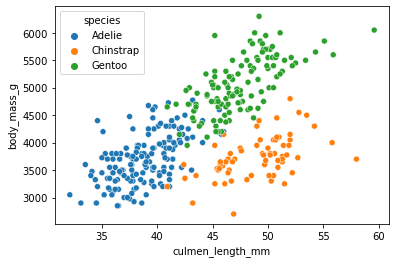

In [13]:
print('culmen_length vs body_mass')
sns.scatterplot(data=data, x='culmen_length_mm', y='body_mass_g', hue='species')
plt.show()

flipper_length vs body_mass


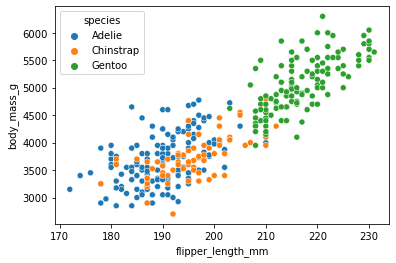

In [14]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

Pairplot


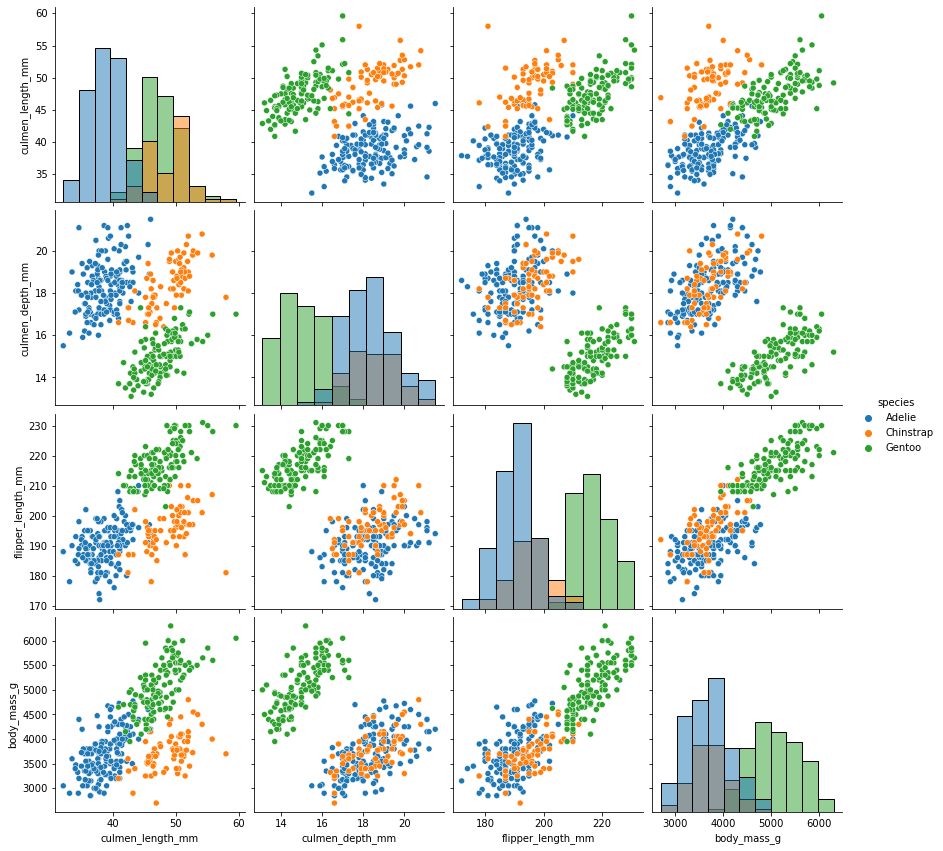

In [15]:
print('Pairplot')
sns.pairplot(data=data[['species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind='hist')
plt.show()

## Missing values

In [16]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

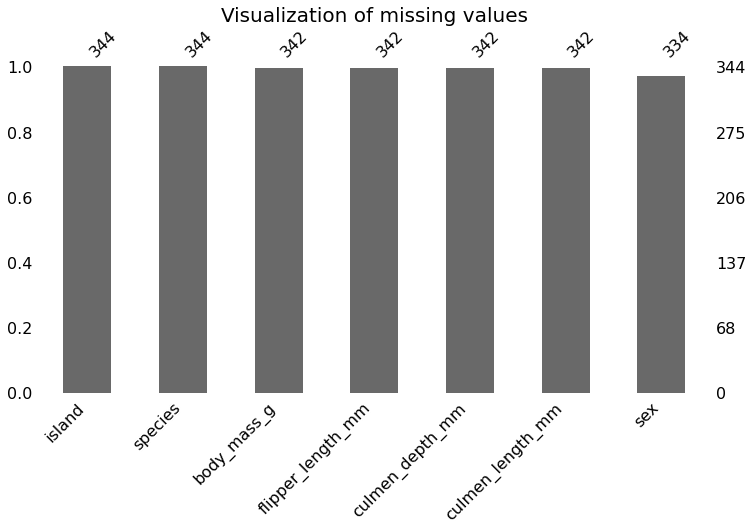

In [17]:
missingno.bar(data, fontsize=16, sort='descending', figsize=(12,6))
plt.title("Visualization of missing values", fontsize=20)
plt.show()

In [18]:
# replace the null rows of the column Sex with its mode

mode_sex = data['sex'].mode()[0]
data['sex'].fillna(mode_sex, inplace=True)
data['sex'] = data['sex'].str.replace(".", mode_sex)

C:\Users\dell\AppData\Local\Temp\ipykernel_3672\366711514.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['sex'] = data['sex'].str.replace(".", mode_sex)


In [19]:
# filling null values of culmenlen, culmendepth, flipper_length_mm and body_mass_g by their mean
# grouped by species.
data['culmen_length_mm'].fillna(data.groupby('species')['culmen_length_mm'].transform('mean'), inplace=True)
data['culmen_depth_mm'].fillna(data.groupby('species')['culmen_depth_mm'].transform('mean'),inplace=True)
data['flipper_length_mm'].fillna(data.groupby('species')['flipper_length_mm'].transform('mean'),inplace=True)
data['body_mass_g'].fillna(data.groupby('species')['body_mass_g'].transform('mean'),inplace=True)

In [20]:
# After handling the empty values 
data.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,344.000000,344.000000,344.000000,344.000000,344
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,179
mean,NaN,NaN,43.917431,17.148339,200.930641,4202.839182,NaN
std,NaN,NaN,5.454118,1.973561,14.060613,801.461347,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.200000,15.575000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.250000,4756.250000,NaN


## Univariate analysis

## Species

In [21]:
data['species']

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

## Island

In [23]:
data['island']

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object

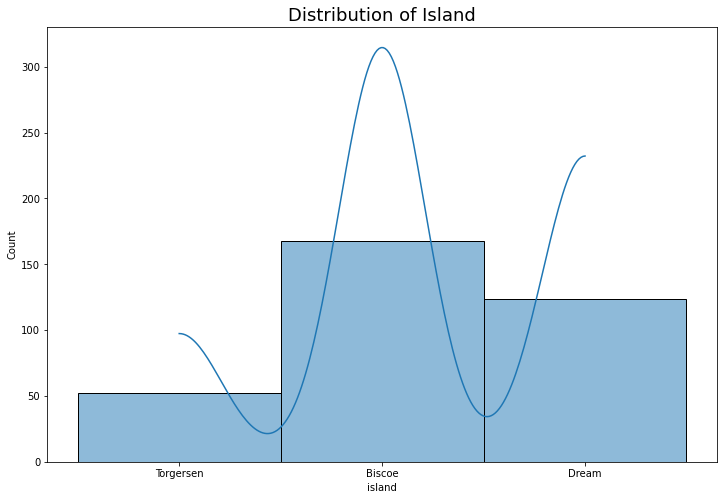

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['island'], kde=True)
plt.title("Distribution of Island", fontsize=18)
plt.show()

## Culmen_length_mm

In [25]:
data['culmen_length_mm']

0      39.100000
1      39.500000
2      40.300000
3      38.791391
4      36.700000
         ...    
339    47.504878
340    46.800000
341    50.400000
342    45.200000
343    49.900000
Name: culmen_length_mm, Length: 344, dtype: float64

In [28]:
data['culmen_length_mm'].min() , data['culmen_length_mm'].max()

(32.1, 59.6)

In [29]:
data['culmen_length_mm'].mean()

43.917431013887395

In [30]:
data['culmen_length_mm'].std()

5.454117794261268

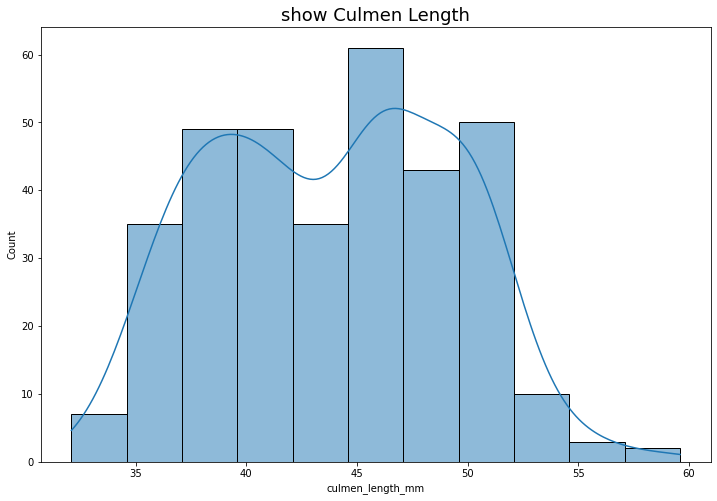

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x = data['culmen_length_mm'], kde=True)
plt.title("show Culmen Length", fontsize = 18)
plt.show()

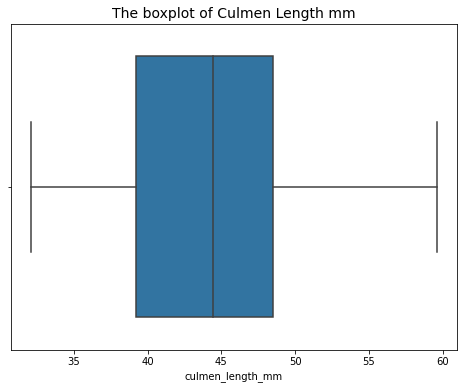

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='culmen_length_mm')
plt.title("The boxplot of Culmen Length mm", fontsize=14)
plt.show()

## Culmen_depth_mm

In [33]:
data['culmen_depth_mm']

0      18.700000
1      17.400000
2      18.000000
3      18.346358
4      19.300000
         ...    
339    14.982114
340    14.300000
341    15.700000
342    14.800000
343    16.100000
Name: culmen_depth_mm, Length: 344, dtype: float64

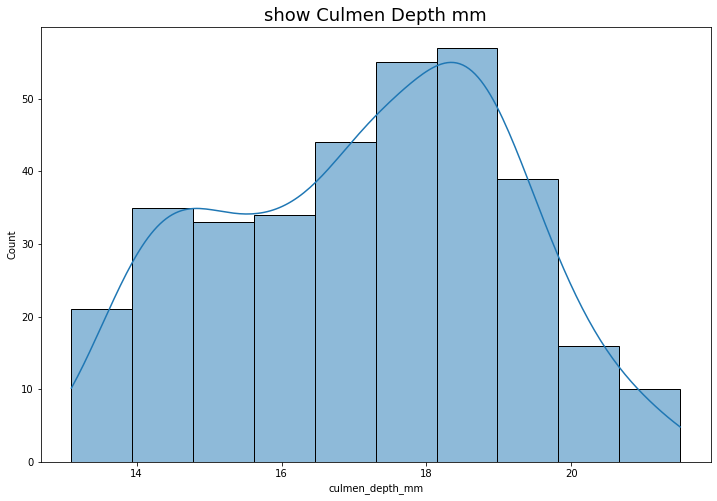

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x = data['culmen_depth_mm'], kde=True)
plt.title("show Culmen Depth mm", fontsize = 18)
plt.show()

## Flipper_length_mm

In [36]:
data['flipper_length_mm']

0      181.000000
1      186.000000
2      195.000000
3      189.953642
4      193.000000
          ...    
339    217.186992
340    215.000000
341    222.000000
342    212.000000
343    213.000000
Name: flipper_length_mm, Length: 344, dtype: float64

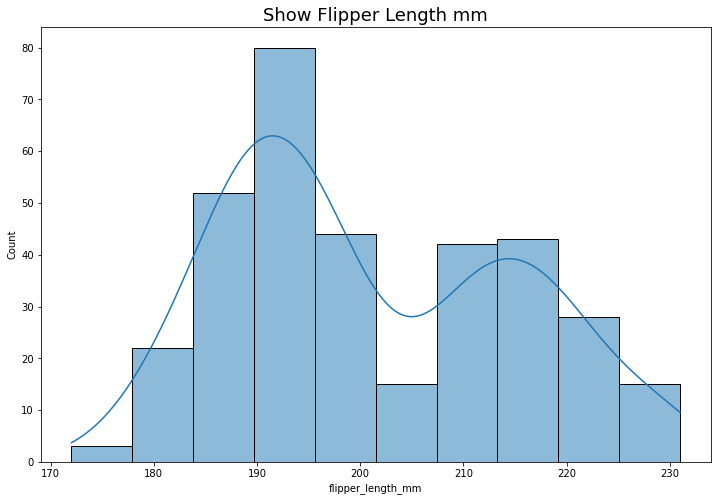

In [43]:
plt.figure(figsize=(12,8))
sns.histplot(data = data, x ='flipper_length_mm', kde = True)
plt.title("Show Flipper Length mm", fontsize = 18)
plt.show()

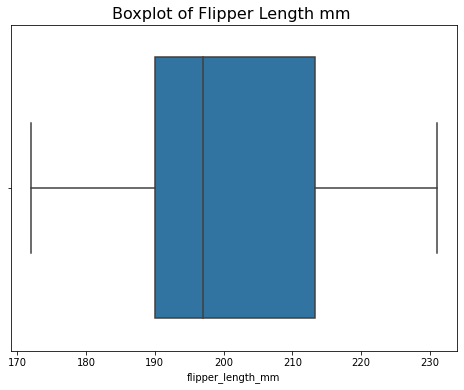

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(data=data, x='flipper_length_mm')
plt.title("Boxplot of Flipper Length mm ", fontsize=16)
plt.show()

## Body_mass_g

In [39]:
data['body_mass_g']

0      3750.000000
1      3800.000000
2      3250.000000
3      3700.662252
4      3450.000000
          ...     
339    5076.016260
340    4850.000000
341    5750.000000
342    5200.000000
343    5400.000000
Name: body_mass_g, Length: 344, dtype: float64

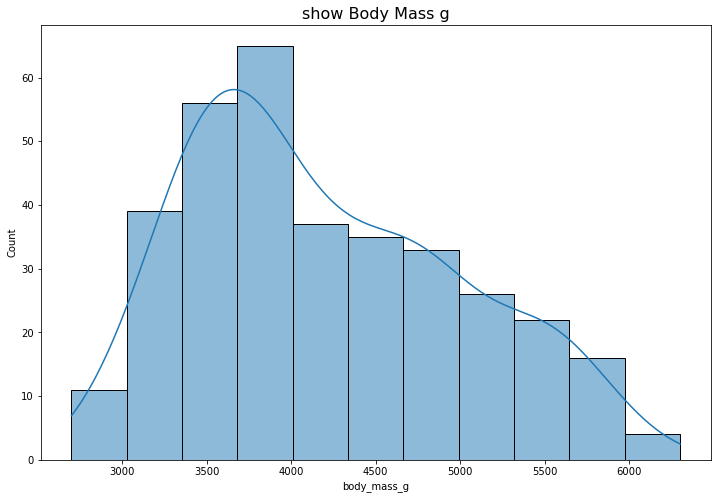

In [40]:
plt.figure(figsize=(12,8))
sns.histplot(data=data, x=data['body_mass_g'], kde=True)
plt.title("show Body Mass g", fontsize=16)
plt.show()

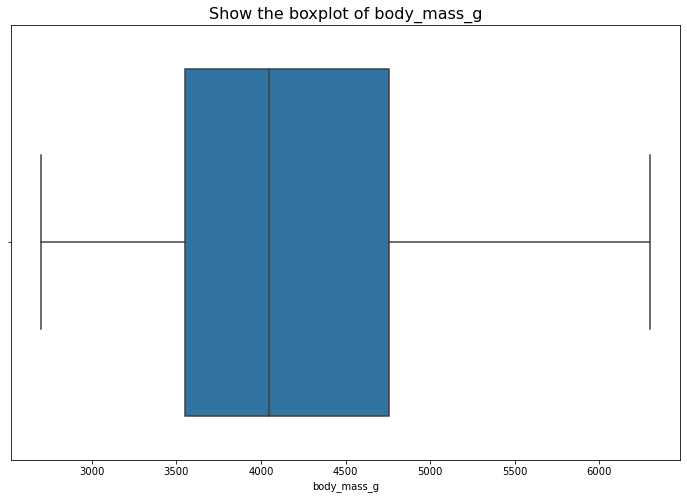

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(data = data, x='body_mass_g')
plt.title("Show the boxplot of body_mass_g", fontsize=16)
plt.show()

## sex

In [42]:
data['sex']

0        MALE
1      FEMALE
2      FEMALE
3        MALE
4      FEMALE
        ...  
339      MALE
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [46]:
data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [47]:
data['sex'].value_counts()

MALE      179
FEMALE    165
Name: sex, dtype: int64

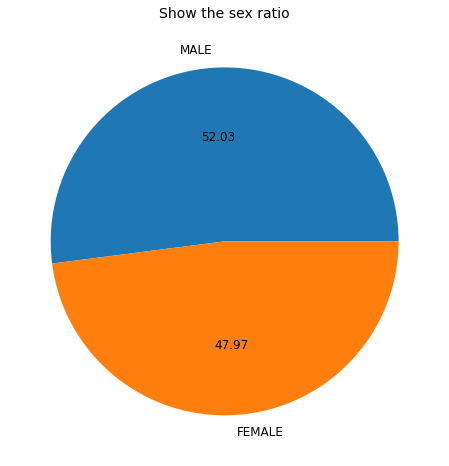

In [48]:
plt.figure(figsize=(10,8))
wedges, labels, pcts = plt.pie(x = data['sex'].value_counts().values, labels = data['sex'].value_counts().index, autopct="%.2f")
for l in labels:
    l.set_fontsize(12)
for p in pcts:
    p.set_fontsize(12)
plt.title("Show the sex ratio", fontsize=14)
plt.show()